In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [90]:
#Step 1: Prepapre data
df_orig1 = pd.read_csv("total_stars.csv") 
df_orig1 = df_orig1.iloc[:95]
df_orig1 = df_orig1.rename(columns={'Unnamed: 0.1': 'ID'})
df_orig1 = df_orig1.drop(columns=['Unnamed: 0', 'Star_name.1', 'Distance.1', 'Mass.1', 'Radius.1','Unnamed: 6'])
df_orig1 = df_orig1.dropna()
df_orig1['ID'] = df_orig1['ID'].apply(pd.to_numeric)
df_orig1['Distance'] = pd.to_numeric(df_orig1['Distance'], errors='coerce')
df_orig1['Mass'] =  pd.to_numeric(df_orig1['Mass'], errors='coerce')
df_orig1['Radius'] =  pd.to_numeric(df_orig1['Radius'], errors='coerce')
print(df_orig1)



    ID         Star_name    Distance    Mass  Radius   Luminosity
0    0               Sun    0.000016   1.000   1.000            1
1    1            Sirius    8.600000   2.100     NaN         25.4
2    2           Canopus  310.000000  15.000  71.000       13,500
3    3    Alpha Centauri    4.400000   1.100   1.200            2
4    4          Arcturus   37.000000   1.100  26.000          170
..  ..               ...         ...     ...     ...          ...
90  91           WOH G64         NaN     NaN     NaN  340-589,000
91  92        TRAPPIST-1   39.600000   0.089   0.120       0.0005
92  93  2MASS J0523-1403   40.300000   0.070   0.086      0.00013
93  94  WISE 0855âˆ’0714    7.270000   0.003     NaN            ?
94  95            Icarus         NaN  33.000     NaN      850,000

[94 rows x 6 columns]


In [91]:
df_orig2 = pd.read_csv("total_stars.csv") 
df_orig2 = df_orig2.iloc[95:]
df_orig2 = df_orig2.shift(periods=-1, axis="columns")
df_orig2 = df_orig2.rename(columns={'Unnamed: 0.1': 'ID'})
df_orig2 = df_orig2.drop(columns=['Unnamed: 0', 'Star_name.1', 'Distance.1', 'Mass.1', 'Radius.1','Unnamed: 6'])
df_orig2['ID'] = df_orig2['ID'].apply(pd.to_numeric)
df_orig2['Distance'] = pd.to_numeric(df_orig2['Distance'], errors='coerce')
df_orig2['Mass'] =  pd.to_numeric(df_orig2['Mass'], errors='coerce')
df_orig2['Radius'] =  pd.to_numeric(df_orig2['Radius'], errors='coerce')

print(df_orig2.head())

    ID                       Star_name  Distance      Mass    Radius   
95   0  SDSS J000013.54+255418.6Â [de]      46.1  0.045820  0.101735  \
96   1         2MASS J00040288-6410358     192.0  0.018137  0.167504   
97   3         2MASS J00242463-0158201      37.7  0.075412  0.112012   
98   5         2MASS J00274197+0503417     236.0  0.029592  0.147979   
99   7          2MASSW J0030300-145033      87.2  0.051548  0.100708   

    Luminosity  
95         NaN  
96         NaN  
97         NaN  
98         NaN  
99         NaN  


In [92]:
df = pd.DataFrame()
df = pd.concat([df_orig1, df_orig2], axis=0)
df = df.drop(columns=['ID', 'Star_name', 'Luminosity'])
df.dropna(inplace=True)
print(df)

       Distance       Mass     Radius
0      0.000016   1.000000   1.000000
2    310.000000  15.000000  71.000000
3      4.400000   1.100000   1.200000
4     37.000000   1.100000  26.000000
5     25.000000   2.200000   2.700000
..          ...        ...        ...
248   74.000000   0.076367   0.112012
249   20.000000   0.005728   0.120233
250   35.900000   0.014319   0.431605
251   35.900000   0.009546   0.390499
252   25.300000   0.028638   0.088376

[220 rows x 3 columns]


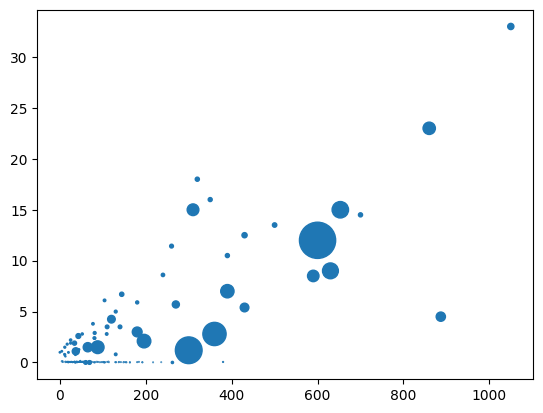

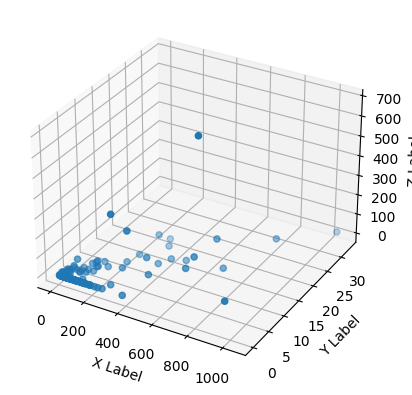

In [93]:
data = df.to_numpy()
plt.scatter(data[:, 0], data[:, 1], data[:,2])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

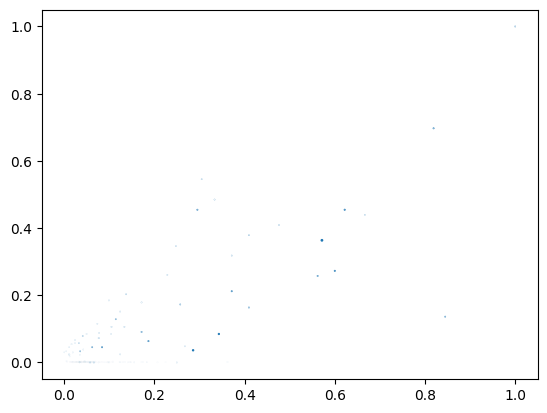

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# df['Distance'] = scaler.fit_transform(df[['Distance']])
# df['Mass'] = scaler.fit_transform(df[['Mass']])
# df['Radius'] = scaler.fit_transform(df[['Radius']])
DF_Distance_Min = df['Distance'].min()
DF_Distance_Max = df['Distance'].max()
DF_Mass_Min = df['Mass'].min()
DF_Mass_Max = df['Mass'].max()
DF_Radius_Min = df['Radius'].min()
DF_Radius_Max = df['Radius'].max()

df['Distance'] = df.Distance.apply(lambda x: (x - DF_Distance_Min) / (DF_Distance_Max - DF_Distance_Min))
df['Mass'] = df.Mass.apply(lambda x: (x - DF_Mass_Min) / (DF_Mass_Max - DF_Mass_Min))
df['Radius'] = df.Radius.apply(lambda x: (x - DF_Radius_Min) / (DF_Radius_Max - DF_Radius_Min))
data = df.to_numpy()
plt.scatter(data[:, 0], data[:, 1], data[:,2])


In [95]:
#Step 2: Select model
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [96]:
#Step 3: Train model
model.fit(data)

C:\Users\loicb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

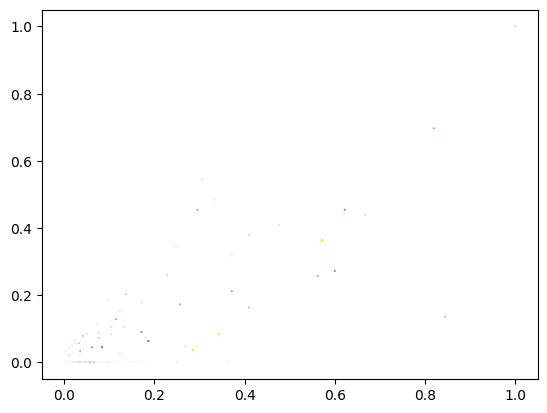

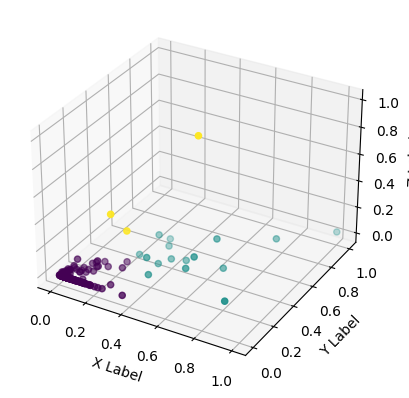

In [97]:
#Step 4: Predict
y_pred = model.predict(data)
plt.scatter(data[:, 0], data[:, 1], data[:, 2], c=y_pred)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], marker='o',c=y_pred)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

   Distance      Mass    Radius
0   0.09619  0.121186  0.004874


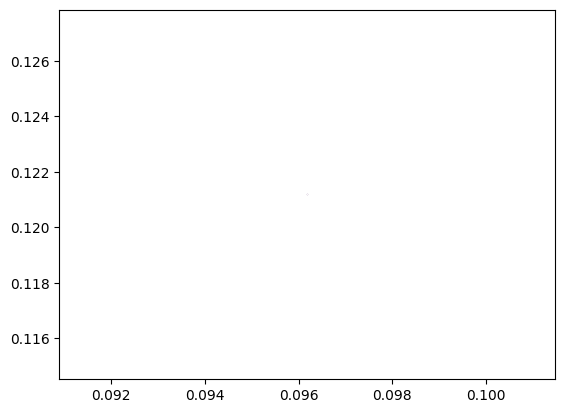

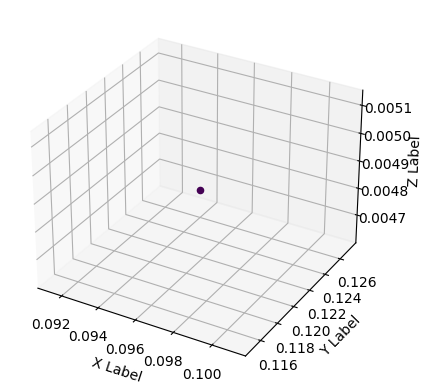

In [98]:
#Step 5: Predict

df_final = pd.read_csv("star.csv") 

df_final['Distance'] = pd.to_numeric(df_final['Distance'], errors='coerce')
df_final['Mass'] =  pd.to_numeric(df_final['Mass'], errors='coerce')
df_final['Radius'] =  pd.to_numeric(df_final['Radius'], errors='coerce')
df_final = df_final.drop(columns=['ID', 'Star_name', 'Luminosity'])

df_final['Distance'] = df_final.Distance.apply(lambda x: (x - DF_Distance_Min) / (DF_Distance_Max - DF_Distance_Min))
df_final['Mass'] = df_final.Mass.apply(lambda x: (x - DF_Mass_Min) / (DF_Mass_Max - DF_Mass_Min))
df_final['Radius'] = df_final.Radius.apply(lambda x: (x - DF_Radius_Min) / (DF_Radius_Max - DF_Radius_Min))

data_final = df_final.to_numpy()
print(df_final)
y_pred = model.predict(data_final)

plt.scatter(data_final[:, 0], data_final[:, 1], data_final[:, 2], c=y_pred)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_final[:, 0], data_final[:, 1], data_final[:, 2], marker='o',c=y_pred)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [100]:
for i, prediction in enumerate(y_pred):
    print("Point", data_final[i], "prédit dans le cluster", prediction)

cluster_labels = model.labels_
unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)

for cluster, count in zip(unique_clusters, cluster_counts):
    print("Cluster", cluster, "a", count, "individus.")

Point [0.09619046 0.12118568 0.00487415] prédit dans le cluster 0
Cluster 0 a 201 individus.
Cluster 1 a 16 individus.
Cluster 2 a 3 individus.
